In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
df = pd.read_csv("D:/Udemy/ML/Data Folder/Churn prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
df.shape

(7043, 21)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [17]:
df.drop('customerID', axis='columns', inplace=True)

In [18]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [19]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [20]:
# object to numeric
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [21]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [22]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [23]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\Yash\AppData\Local\Temp\ipykernel_628\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [24]:
df1.TotalCharges.dtypes

dtype('float64')

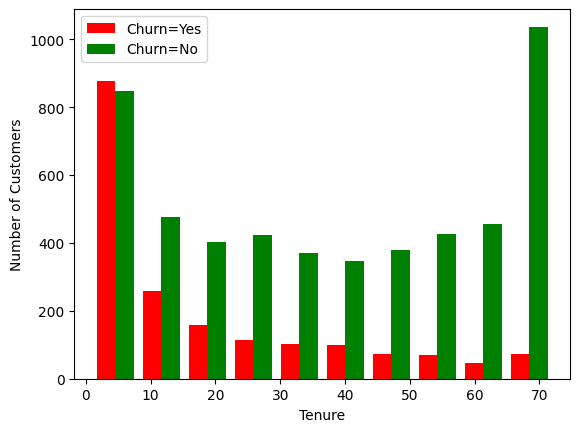

In [25]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("Tenure")
plt.ylabel("Number of Customers")
plt.hist([tenure_churn_yes,tenure_churn_no], color=['red', 'green'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

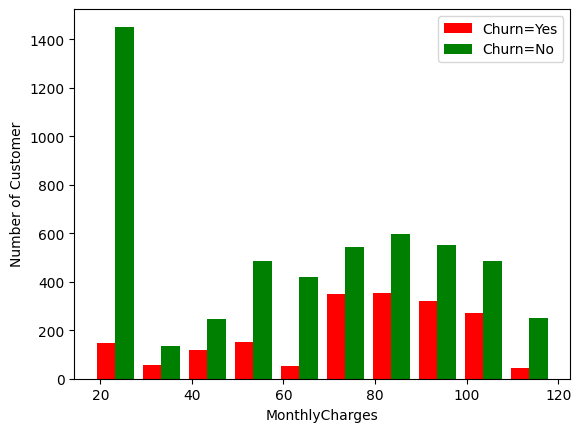

In [26]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel("MonthlyCharges")
plt.ylabel("Number of Customer")
plt.hist([mc_churn_yes, mc_churn_no], color = ['red', 'green'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

In [27]:
def label_encoder():
    for column in df1:
        if df1[column].dtype == 'object':
            print (f'{column} : {df1[column].unique()}')

In [28]:
label_encoder()

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [29]:
df1.replace('No internet service', 'No', inplace=True)

C:\Users\Yash\AppData\Local\Temp\ipykernel_628\2569343429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service', 'No', inplace=True)


In [30]:
df1.replace('No phone service', 'No', inplace=True)

C:\Users\Yash\AppData\Local\Temp\ipykernel_628\2113595939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service', 'No', inplace=True)


In [31]:
label_encoder()

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [32]:
yes_no_cols=['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for cols in yes_no_cols:
    df1[cols].replace({'Yes': 1, 'No' : 0}, inplace=True)


C:\Users\Yash\AppData\Local\Temp\ipykernel_628\2554820930.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[cols].replace({'Yes': 1, 'No' : 0}, inplace=True)


In [33]:
for i in df1:
    print(df1[i].unique())

['Female' 'Male']
[0 1]
[1 0]
[0 1]
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
[0 1]
[0 1]
['DSL' 'Fiber optic' 'No']
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
['Month-to-month' 'One year' 'Two year']
[1 0]
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
[0 1]


In [34]:
df1['gender'].replace({'Male' : 1,'Female':0}, inplace=True)

C:\Users\Yash\AppData\Local\Temp\ipykernel_628\2863312214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Male' : 1,'Female':0}, inplace=True)


In [35]:
# one hot encoding
df2 = pd.get_dummies(data=df1, columns=['InternetService', 'Contract', 'PaymentMethod'], dtype=int)
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [36]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [37]:
df2.shape

(7032, 27)

In [38]:
# Scaling
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [39]:
df2.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3270,0,0,0,0,0.042254,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
4990,0,0,1,1,0.070423,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [40]:
X = df2.drop('Churn', axis='columns')
Y = df2['Churn']

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [42]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, kernel_initializer='he_uniform', input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, kernel_initializer='he_uniform', activation='relu'),
    keras.layers.Dense(1, kernel_initializer='glorot_uniform', activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics='accuracy'
)

model.fit(X_train, Y_train, epochs=100)


Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.5118 - accuracy: 0.7344
Epoch 2/100
176/176 [==============================] - 0s 935us/step - loss: 0.4410 - accuracy: 0.7847
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4304 - accuracy: 0.7884
Epoch 4/100
176/176 [==============================] - 0s 900us/step - loss: 0.4258 - accuracy: 0.7927
Epoch 5/100
176/176 [==============================] - 0s 838us/step - loss: 0.4219 - accuracy: 0.7982
Epoch 6/100
176/176 [==============================] - 0s 832us/step - loss: 0.4194 - accuracy: 0.8009
Epoch 7/100
176/176 [==============================] - 0s 847us/step - loss: 0.4173 - accuracy: 0.8053
Epoch 8/100
176/176 [==============================] - 0s 988us/step - loss: 0.4152 - accuracy: 0.8043
Epoch 9/100
176/176 [==============================] - 0s 867us/step - loss: 0.4145 - accuracy: 0.8066
Epoch 10/100
176/176 [==============================] - 0s 913us/step - loss:

In [55]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation = 'relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = 'accuracy'
)
model.fit(X_train, Y_train, epochs = 100)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.6534 - accuracy: 0.6261
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.5058 - accuracy: 0.7445
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4675 - accuracy: 0.7726
Epoch 4/100
176/176 [==============================] - 0s 963us/step - loss: 0.4537 - accuracy: 0.7863
Epoch 5/100
176/176 [==============================] - 0s 963us/step - loss: 0.4496 - accuracy: 0.7895
Epoch 6/100
176/176 [==============================] - 0s 975us/step - loss: 0.4466 - accuracy: 0.7865
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4464 - accuracy: 0.7854
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4385 - accuracy: 0.7957
Epoch 9/100
176/176 [==============================] - 0s 980us/step - loss: 0.4382 - accuracy: 0.7922
Epoch 10/100
176/176 [==============================] - 0s 975us/step - loss: 0.437

In [45]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 20)                540       
                                                                 
 dropout_4 (Dropout)         (None, 20)                0         
                                                                 
 dense_10 (Dense)            (None, 15)                315       
                                                                 
 dropout_5 (Dropout)         (None, 15)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 16        
                                                                 
Total params: 871
Trainable params: 871
Non-trainable params: 0
_________________________________________________________________


In [46]:
# print(model.history.keys())

In [47]:
model.evaluate(X_test, Y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4119 - accuracy: 0.8117


[0.41190463304519653, 0.8116559982299805]

In [48]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 742us/step


array([[0.0110664 ],
       [0.6451856 ],
       [0.39327282],
       [0.50049466],
       [0.3553611 ]], dtype=float32)

In [49]:
y_pred=[]
for i in yp:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [50]:
y_pred[:10]

[0, 1, 0, 1, 0, 0, 0, 0, 1, 0]

In [51]:
Y_test[:10]

5580    0
3438    1
2175    1
4237    1
511     0
6769    0
5597    1
3468    0
4482    1
661     0
Name: Churn, dtype: int64

In [52]:
# classification report
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1051
           1       0.69      0.46      0.55       356

    accuracy                           0.81      1407
   macro avg       0.76      0.69      0.72      1407
weighted avg       0.80      0.81      0.80      1407



Text(45.722222222222214, 0.5, 'Truth')

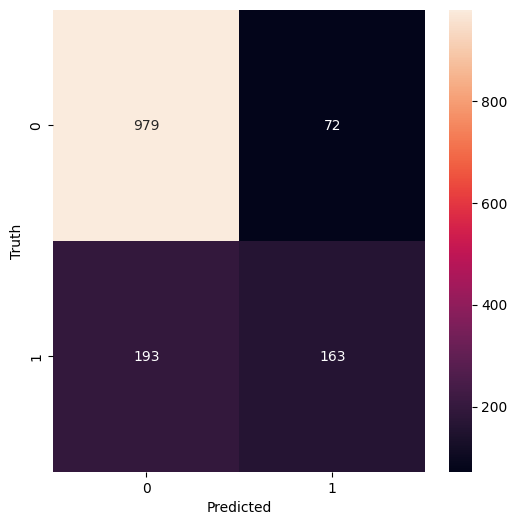

In [53]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=Y_test, predictions=y_pred)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [54]:
# just a cp problem
input_str = input("Enter array elements separated by commas: ")
a = input_str.split(",")
a.sort()
n=len(a)
c=0
for i in reversed(a):
    for j in a:
        if i>j:
            c=c+1
print(c)

0
